# Task One

In [3]:
#import necessary libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#load the dataset:

data = pd.read_csv(r'D:\fauzan\MSc Data Analytics\Predictive Analytics & Machine Learning using Python\dataset_credit_card_fraud_detection.csv')

In [5]:
#checking data information:

df=data.copy()
df.info()
print()
print(df.shape)
print()
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1048575 non-null  int64  
 1   trans_date_trans_time  1048575 non-null  object 
 2   cc_num                 1048575 non-null  float64
 3   merchant               1048575 non-null  object 
 4   category               1048575 non-null  object 
 5   amt                    1048575 non-null  float64
 6   first                  1048575 non-null  object 
 7   last                   1048575 non-null  object 
 8   gender                 1048575 non-null  object 
 9   street                 1048575 non-null  object 
 10  city                   1048575 non-null  object 
 11  state                  1048575 non-null  object 
 12  zip                    1048575 non-null  int64  
 13  lat                    1048575 non-null  float64
 14  long              

In [6]:
#giving name to un-named column:

df.rename(columns={'Unnamed: 0': 'unique_id'}, inplace=True)

In [7]:
# Convert date columns:

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

In [8]:
# Feature engineering:

df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
df['transaction_day'] = df['trans_date_trans_time'].dt.dayofweek
df['customer_age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year

In [9]:
# Class balance:

print(df['is_fraud'].value_counts(normalize=True))

is_fraud
0    0.994272
1    0.005728
Name: proportion, dtype: float64


In [10]:
# Check missing values:

print(df.isnull().sum())

unique_id                0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
transaction_hour         0
transaction_day          0
customer_age             0
dtype: int64


In [11]:
# Basic statistics:

df.describe()

,unique_id,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,transaction_hour,transaction_day,customer_age
count,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.242870e+05,2019-08-14 03:47:22.322695168,4.171800e+17,7.027910e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1973-09-23 10:23:35.157141776,1.344906e+09,3.853346e+01,-9.022648e+01,5.727773e-03,1.280077e+01,3.135594e+00,4.588899e+01
min,0.000000e+00,2019-01-01 00:00:00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1924-10-30 00:00:00,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01
25%,2.621435e+05,2019-05-10 20:39:00,1.800000e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1962-08-13 00:00:00,1.336682e+09,3.472954e+01,-9.689864e+01,0.000000e+00,7.000000e+00,1.000000e+00,3.200000e+01
50%,5.242870e+05,2019-08-13 23:45:00,3.520000e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1975-10-11 00:00:00,1.344902e+09,3.936295e+01,-8.743923e+01,0.000000e+00,1.400000e+01,3.000000e+00,4.400000e+01
75%,7.864305e+05,2019-12-01 12:46:30,4.640000e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1987-02-14 00:00:00,1.354366e+09,4.195602e+01,-8.023228e+01,0.000000e+00,1.900000e+01,5.000000e+00,5.700000e+01
max,1.048574e+06,2020-03-10 16:08:00,4.990000e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,2005-01-29 00:00:00,1.362932e+09,6.751027e+01,-6.695090e+01,1.000000e+00,2.300000e+01,6.000000e+00,9.600000e+01
std,3.026977e+05,NaN,1.308893e+18,1.599518e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,NaN,1.019700e+07,5.111233e+00,1.377093e+01,7.546503e-02,6.816861e+00,2.200499e+00,1.736625e+01


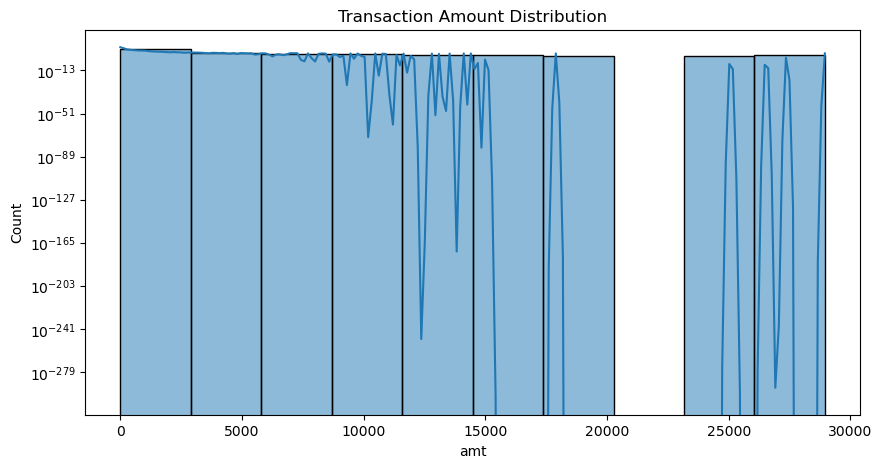

In [12]:
#Initial visualization for EDA:

#Transaction amount distribution:
plt.figure(figsize=(10,5))
sns.histplot(df['amt'], bins=10, kde=True)
plt.title('Transaction Amount Distribution')
plt.yscale('log')
plt.show()

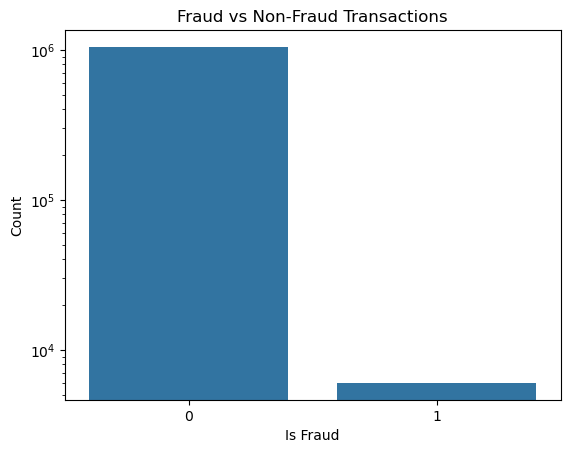

In [13]:
#Class distribution:

sns.countplot(x='is_fraud', data=df)
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

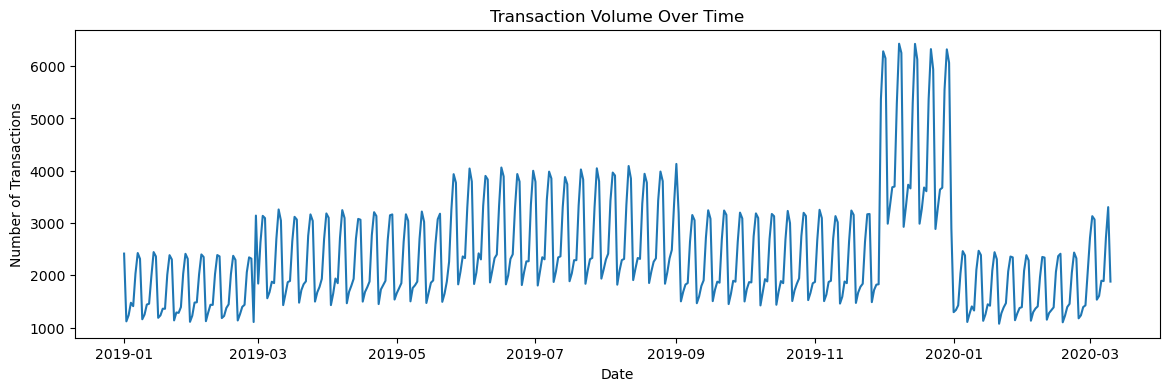

In [14]:
#Transaction volume over time:

df['trans_date_trans_time'].dt.date.value_counts().sort_index().plot(figsize=(14, 4))
plt.title('Transaction Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

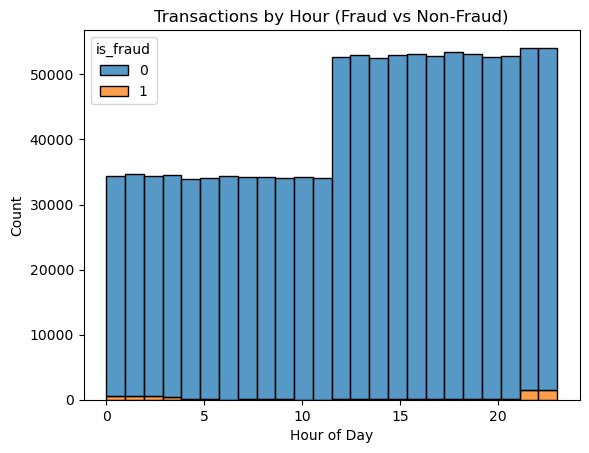

In [15]:
#Transactions by Hour:

sns.histplot(data=df, x='transaction_hour', bins=24, hue='is_fraud', multiple='stack')
plt.title('Transactions by Hour (Fraud vs Non-Fraud)')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

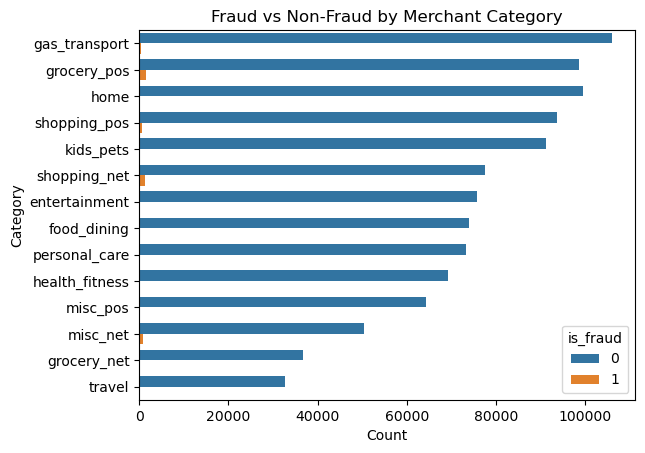

In [16]:
#Fraud Count by Merchant Category:

sns.countplot(y='category', hue='is_fraud', data=df, order=df['category'].value_counts().index)
plt.title('Fraud vs Non-Fraud by Merchant Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

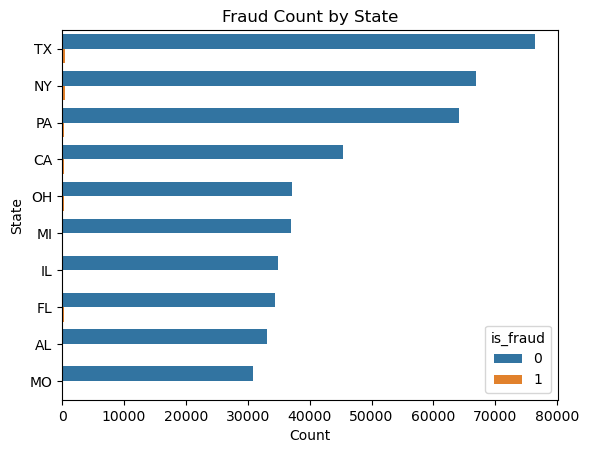

In [17]:
#Top States by Fraud Count:

sns.countplot(y='state', hue='is_fraud', data=df, order=df['state'].value_counts().head(10).index)
plt.title('Fraud Count by State')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()

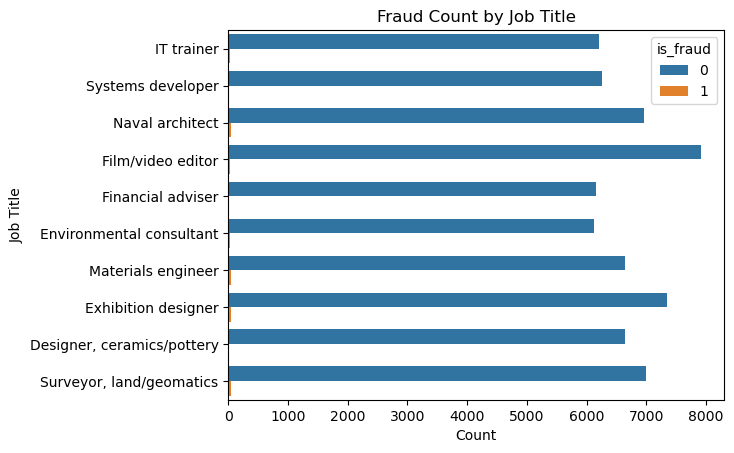

In [18]:
#Fraud Count by Job:

top_jobs = df['job'].value_counts().head(10).index
sns.countplot(y='job', hue='is_fraud', data=df[df['job'].isin(top_jobs)])
plt.title('Fraud Count by Job Title')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

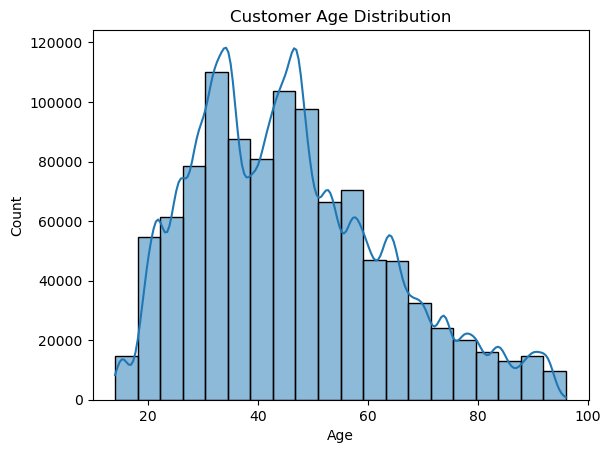

In [19]:
#Age Distribution:

sns.histplot(df['customer_age'], bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.show()

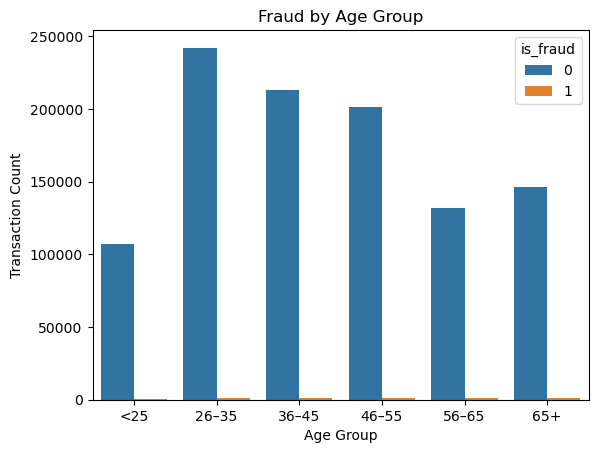

In [20]:
#Fraud by Age Group:

df['age_group'] = pd.cut(df['customer_age'], bins=[0, 25, 35, 45, 55, 65, 100], labels=['<25', '26–35', '36–45', '46–55', '56–65', '65+'])
sns.countplot(x='age_group', hue='is_fraud', data=df)
plt.title('Fraud by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Transaction Count')
plt.show()

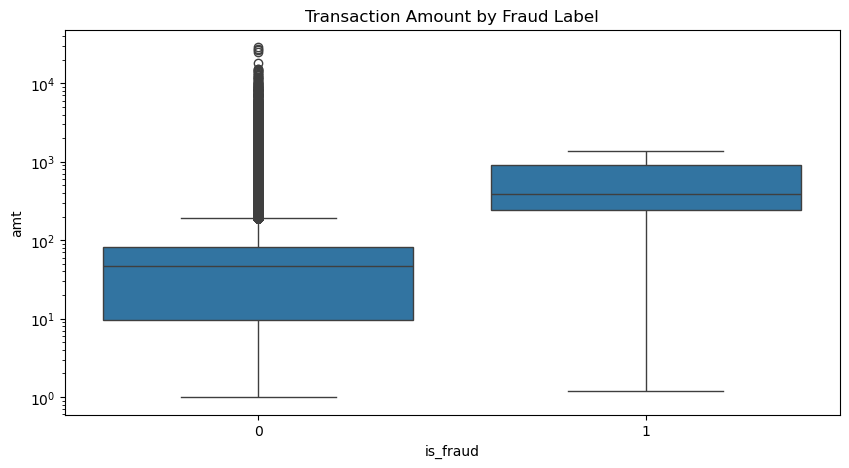

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.title('Transaction Amount by Fraud Label')
plt.yscale('log')
plt.show()

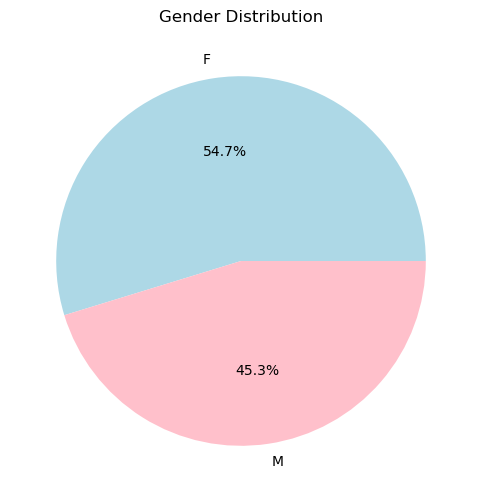

In [22]:
# Gender distribution
plt.figure(figsize=(6, 6))
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

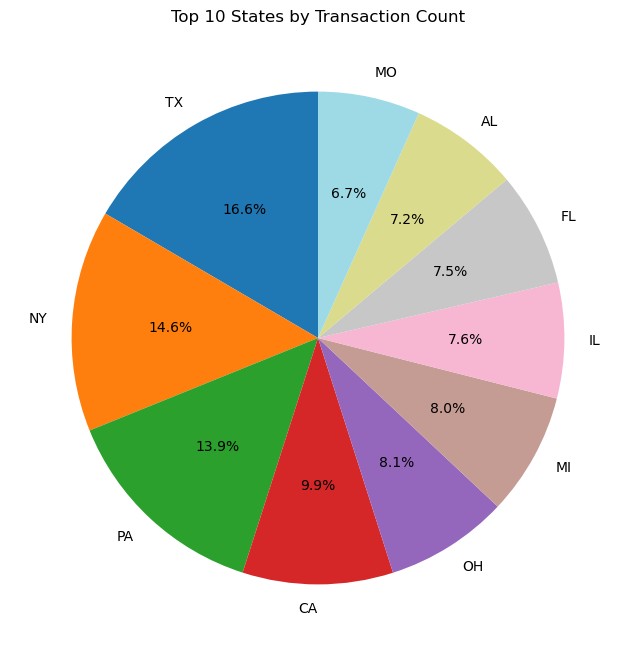

In [23]:
# State-wise transaction counts (top 10 states)
plt.figure(figsize=(8, 8))
top_states = df['state'].value_counts().head(10)
top_states.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20')
plt.title('Top 10 States by Transaction Count')
plt.ylabel('')
plt.show()

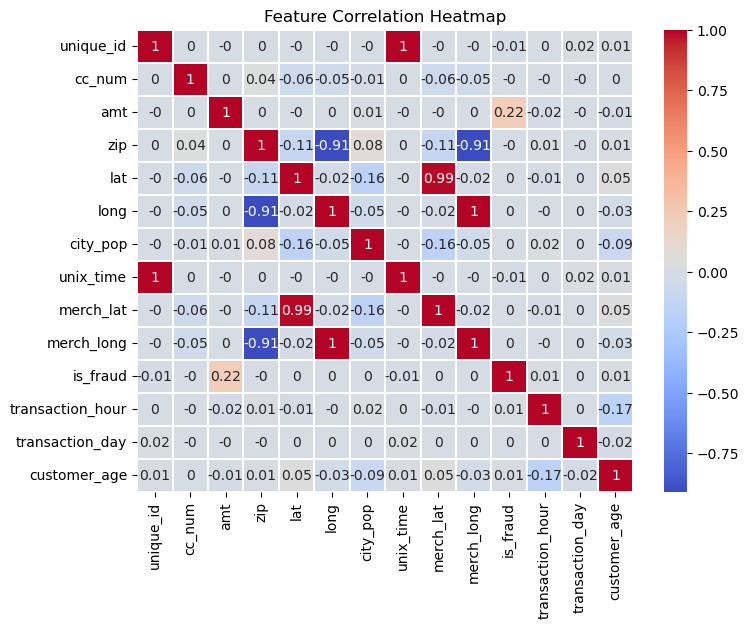

In [24]:
# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr.round(2), cmap='coolwarm', annot=True, linewidths=0.05)
plt.title('Feature Correlation Heatmap')
plt.show()

is_fraud            1.000000
amt                 0.218417
transaction_hour    0.012416
customer_age        0.010986
merch_long          0.002055
long                0.002030
city_pop            0.001824
transaction_day     0.001399
lat                 0.001355
merch_lat           0.001212
zip                -0.001844
cc_num             -0.002300
unique_id          -0.009041
unix_time          -0.009707
Name: is_fraud, dtype: float64


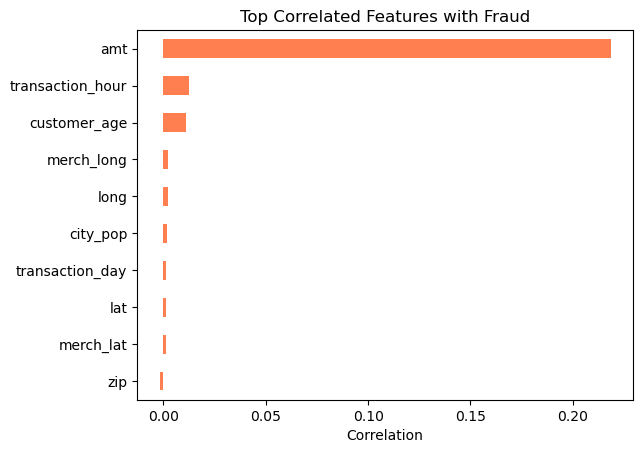

In [25]:
# Sort correlations with respect to 'is_fraud'
fraud_corr = corr['is_fraud'].sort_values(ascending=False)
print(fraud_corr)

fraud_corr.drop('is_fraud').head(10).plot(kind='barh', color='coral')
plt.title('Top Correlated Features with Fraud')
plt.xlabel('Correlation')
plt.gca().invert_yaxis()
plt.show()

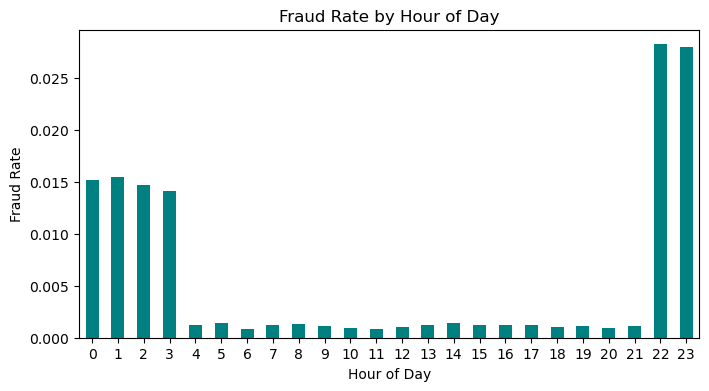

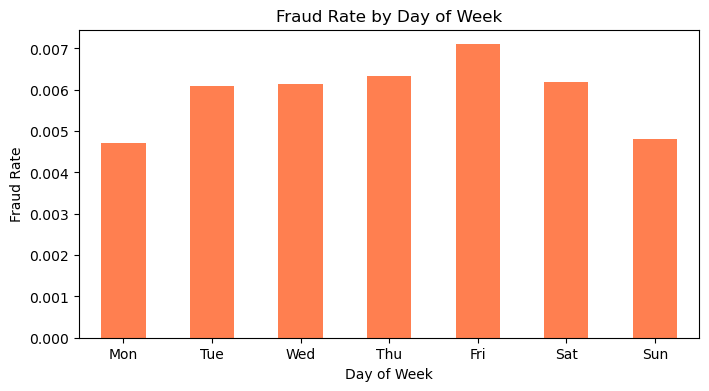

In [26]:
# Plot fraud rate by hour of day
fraud_by_hour = df.groupby('transaction_hour')['is_fraud'].mean()
plt.figure(figsize=(8, 4))
fraud_by_hour.plot(kind='bar', color='teal')
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=0)
plt.show()

# Plot fraud rate by day of week
# Ensure 'dayofweek' exists (0=Monday, 6=Sunday)
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
fraud_by_day = df.groupby('transaction_day')['is_fraud'].mean()
plt.figure(figsize=(8, 4))
fraud_by_day.index = days
fraud_by_day.plot(kind='bar', color='coral')
plt.title('Fraud Rate by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=0)
plt.show()

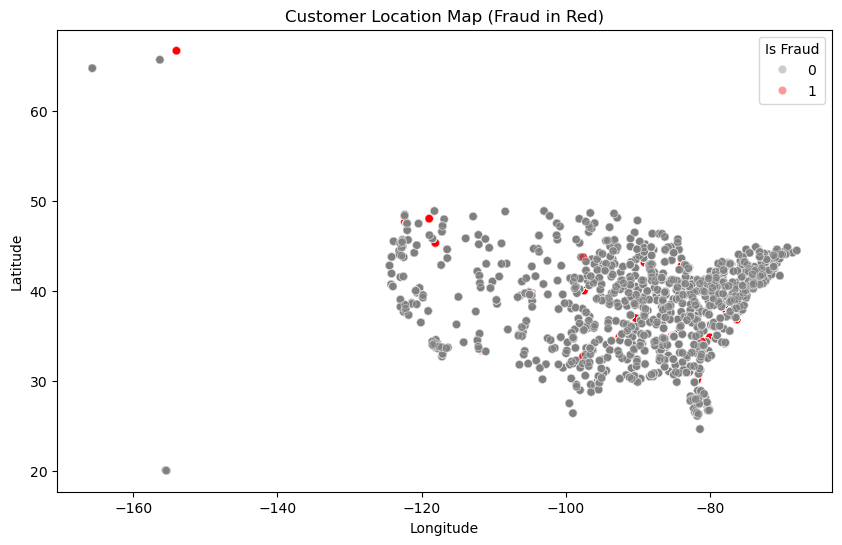

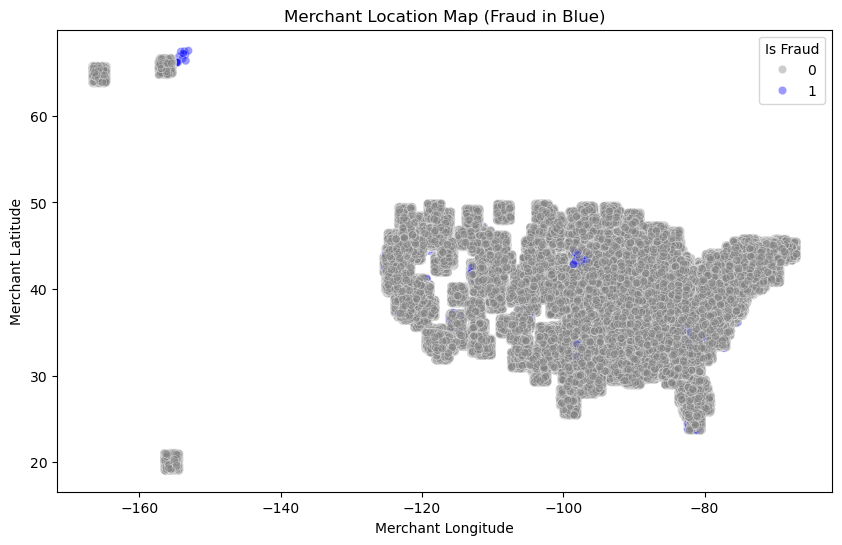

In [27]:
# Scatter plot: Customer location, colored by fraud
plt.figure(figsize=(10, 6))
sns.scatterplot(x='long', y='lat', hue='is_fraud', data=df, alpha=0.4, palette={0: 'grey', 1: 'red'})
plt.title('Customer Location Map (Fraud in Red)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Is Fraud')
plt.show()

# Scatter plot: Merchant location, colored by fraud
plt.figure(figsize=(10, 6))
sns.scatterplot(x='merch_long', y='merch_lat', hue='is_fraud', data=df, alpha=0.4, palette={0: 'grey', 1: 'blue'})
plt.title('Merchant Location Map (Fraud in Blue)')
plt.xlabel('Merchant Longitude')
plt.ylabel('Merchant Latitude')
plt.legend(title='Is Fraud')
plt.show()

In [28]:
#Drop unnecessary identifier column:

df.drop(columns=['cc_num', 'first', 'last', 'street', 'trans_num', 'trans_date_trans_time', 'dob'], inplace=True)

In [29]:
# One-hot encode low-cardinality columns:

low_card_cols = ['category', 'gender']
df = pd.get_dummies(df, columns=low_card_cols, drop_first=True)

In [30]:
# Label encode high-cardinality columns:

high_card_cols = ['merchant', 'job', 'state', 'city', 'age_group']
for col in high_card_cols:
    df[col] = df[col].astype('category').cat.codes

In [31]:
df

,unique_id,merchant,amt,city,state,zip,lat,long,city_pop,job,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,0,514,4.97,517,27,28654,36.0788,-81.1781,3495,370,...,False,False,False,True,False,False,False,False,False,False
1,1,241,107.23,600,47,99160,48.8878,-118.2105,149,428,...,False,False,False,False,False,False,False,False,False,False
2,2,390,220.11,459,13,83252,42.1808,-112.2620,4154,307,...,False,False,False,False,False,False,False,False,False,True
3,3,360,45.00,83,26,59632,46.2306,-112.1138,1939,328,...,False,False,False,False,False,False,False,False,False,True
4,4,297,41.96,212,45,24433,38.4207,-79.4629,99,116,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,166,77.00,23,20,21405,39.0305,-76.5515,92106,2,...,True,False,False,False,False,False,False,False,False,False
1048571,1048571,110,116.94,331,12,52563,41.1826,-92.3097,1583,211,...,False,False,False,False,True,False,False,False,False,False
1048572,1048572,456,21.27,450,17,40202,38.2507,-85.7476,736284,175,...,False,True,False,False,False,False,False,False,False,False
1048573,1048573,620,9.52,850,34,11796,40.7320,-73.1000,4056,193,...,True,False,False,False,False,False,False,False,False,False


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 32 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   unique_id                1048575 non-null  int64  
 1   merchant                 1048575 non-null  int16  
 2   amt                      1048575 non-null  float64
 3   city                     1048575 non-null  int16  
 4   state                    1048575 non-null  int8   
 5   zip                      1048575 non-null  int64  
 6   lat                      1048575 non-null  float64
 7   long                     1048575 non-null  float64
 8   city_pop                 1048575 non-null  int64  
 9   job                      1048575 non-null  int16  
 10  unix_time                1048575 non-null  int64  
 11  merch_lat                1048575 non-null  float64
 12  merch_long               1048575 non-null  float64
 13  is_fraud                 1048575 non-null 

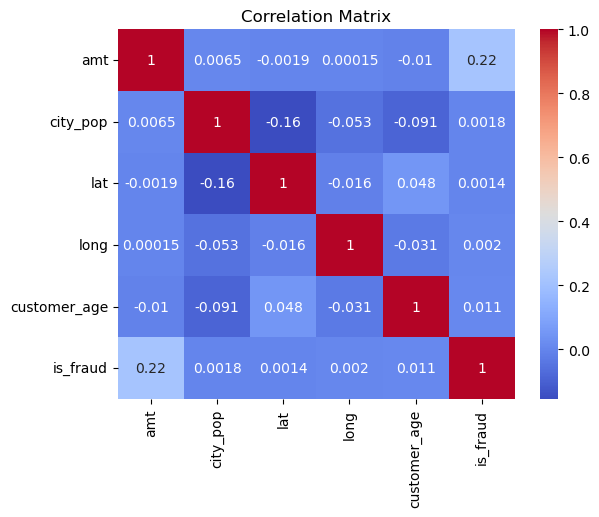

In [33]:
# Correlations
corr = df[['amt', 'city_pop', 'lat', 'long', 'customer_age', 'is_fraud']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Task Two

In [35]:
#import necessary libraries:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, silhouette_score, davies_bouldin_score
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [36]:
#Selecting Features and target:

X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

In [37]:
#Split into training and testing sets:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Decision Tree Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    208514
           1       0.13      0.95      0.22      1201

    accuracy                           0.96    209715
   macro avg       0.56      0.96      0.60    209715
weighted avg       0.99      0.96      0.98    209715

Confusion Matrix:
 [[200597   7917]
 [    60   1141]]
ROC-AUC Score: 0.9818122919474506


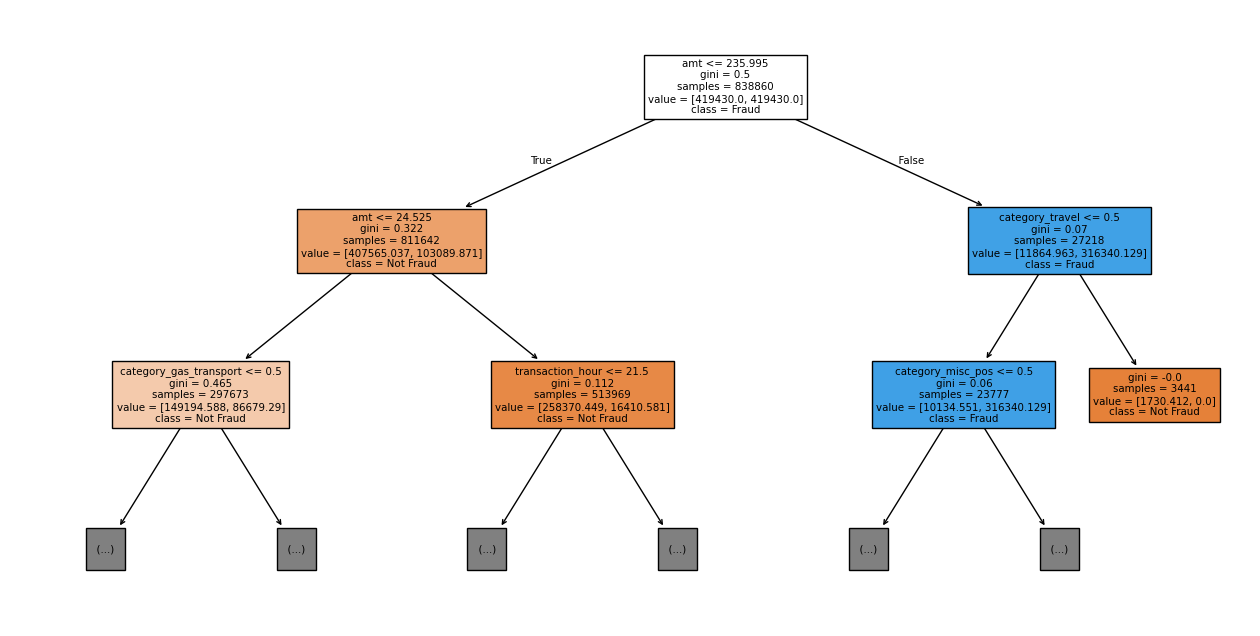

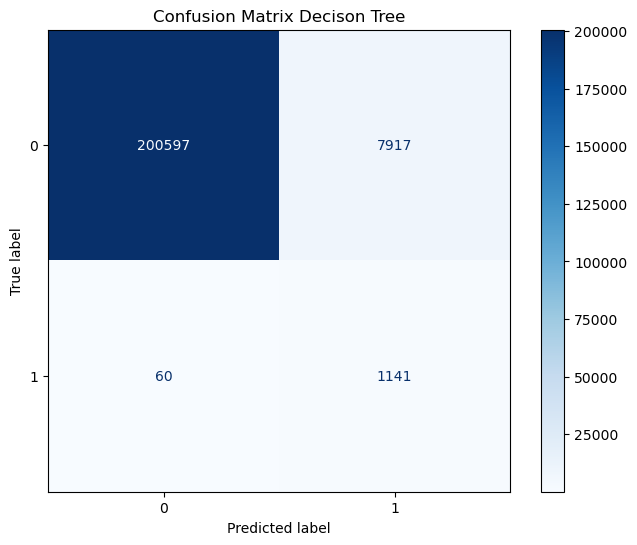

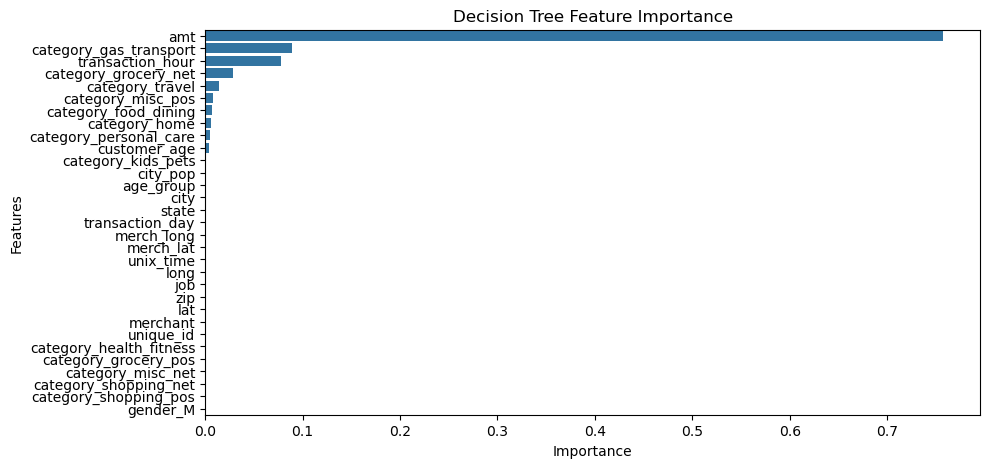

In [38]:
# 1. Decision Tree

dt = DecisionTreeClassifier(max_depth=6, random_state=42, class_weight='balanced')
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, dt.predict_proba(X_test)[:,1]))

plt.figure(figsize=(16,8))
plot_tree(dt, feature_names=X.columns, class_names=['Not Fraud', 'Fraud'], filled=True, max_depth=2)
plt.show()

cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d', ax=ax)
plt.title("Confusion Matrix Decison Tree")
plt.grid(False)
plt.show()

dt_importance = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=dt_importance.values, y=dt_importance.index)
plt.title("Decision Tree Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

XGBoost Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    208514
           1       0.30      0.96      0.46      1201

    accuracy                           0.99    209715
   macro avg       0.65      0.97      0.73    209715
weighted avg       1.00      0.99      0.99    209715

ROC-AUC Score: 0.9982977240072463
Confusion Matrix:
 [[205842   2672]
 [    48   1153]]


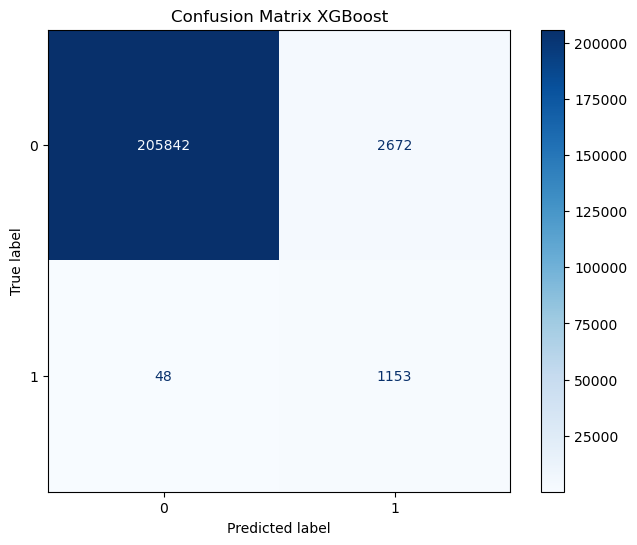

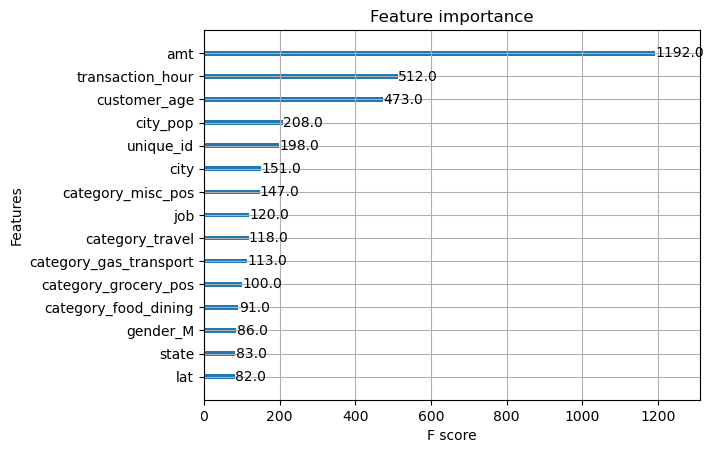

In [39]:
# 2. XGBoost

xgb = XGBClassifier(
    n_estimators=100, max_depth=6, learning_rate=0.1, scale_pos_weight=(len(y_train)-sum(y_train))/sum(y_train),
    eval_metric='logloss', random_state=42
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

cm2 = confusion_matrix(y_test, y_pred_xgb)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[0, 1])
fig, ax = plt.subplots(figsize=(8, 6))
disp2.plot(cmap=plt.cm.Blues, values_format='d', ax=ax)
plt.title("Confusion Matrix XGBoost")
plt.grid(False)
plt.show()

plot_importance(xgb, max_num_features=15)
plt.show()

In [ ]:
#3. K-Means Clustering

# Scale data for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Evaluate metrics for k from 1 to 11:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(K)
plt.grid(True)
plt.show()

# Fit final KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit_predict(X_scaled)
df['cluster'] = kmeans.inertia_
df['cluster']

# Compare clusters to actual fraud
print("Fraud distribution by cluster:\n", df.groupby('cluster')['is_fraud'].value_counts())


In [ ]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

# Run KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Plot clusters in PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='cluster', palette='viridis', alpha=0.5)
plt.title('K-Means Clusters in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()